In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [3]:
df = pd.read_csv('letter-recognition.data',header=None)

train_df = df[:1600]
test_df = df[16000:16000+400]

X = train_df.ix[:,1:16].to_numpy() 
y = np.array([ord(l)-ord('A') for l in train_df.ix[:,0].to_numpy()])

In [4]:
def get_winner(class1, class2):
    
    numbers = [*range(26)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 9)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-letter2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
winner_list = []

for class1 in range(0,25):
    for class2 in range(class1+1,26):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:64
number of class2:70

 ****** Running generation 0 ****** 

Population's average fitness: 0.51104 stdev: 0.09752
Best fitness: 0.97761 - size: (2, 3) - species 6 - id 33
Average adjusted fitness: 0.347
Mean genetic distance 2.703, standard deviation 0.514
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.550 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53522 stdev: 0.13198
Best fitness: 0.97761 - size: (2, 3) - species 6 - id 33
Average adjusted fitness: 0.440
Mean genetic distance 2.847, standard deviation 0.546
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.546 sec (0.548 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55876 stdev: 0.13939
Best fitness: 0.97761 - size: (3, 5) - species 8 - id 519
Average adjusted fitness: 0.344
Mean genetic distance 2.914, standard deviation 0.561
Population of 200 members in 20 species
Total extinctions: 0
G


 ****** Running generation 6 ****** 

Population's average fitness: 0.60346 stdev: 0.16038
Best fitness: 0.97794 - size: (4, 7) - species 4 - id 1134
Average adjusted fitness: 0.339
Mean genetic distance 2.913, standard deviation 0.586
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.712 sec (0.638 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61113 stdev: 0.17821
Best fitness: 0.97794 - size: (4, 7) - species 7 - id 1134
Average adjusted fitness: 0.571
Mean genetic distance 2.971, standard deviation 0.573
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.885 sec (0.669 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62438 stdev: 0.16738
Best fitness: 0.98529 - size: (7, 14) - species 15 - id 1534
Average adjusted fitness: 0.588
Mean genetic distance 3.045, standard deviation 0.568
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 0

Population's average fitness: 0.55920 stdev: 0.13538
Best fitness: 0.94400 - size: (5, 8) - species 3 - id 669
Average adjusted fitness: 0.436
Mean genetic distance 2.884, standard deviation 0.545
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.579 sec (0.556 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58945 stdev: 0.15970
Best fitness: 0.96000 - size: (4, 6) - species 19 - id 876
Average adjusted fitness: 0.404
Mean genetic distance 2.953, standard deviation 0.558
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.639 sec (0.572 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59517 stdev: 0.16263
Best fitness: 0.96800 - size: (6, 11) - species 7 - id 1016
Average adjusted fitness: 0.529
Mean genetic distance 2.976, standard deviation 0.562
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.921 sec (0.630 average)

 ****** Running

Population's average fitness: 0.50412 stdev: 0.09989
Best fitness: 0.88435 - size: (2, 3) - species 5 - id 42
Average adjusted fitness: 0.392
Mean genetic distance 2.715, standard deviation 0.551
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 0.547 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54003 stdev: 0.09684
Best fitness: 0.93878 - size: (3, 5) - species 1 - id 255
Average adjusted fitness: 0.234
Mean genetic distance 2.902, standard deviation 0.571
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.671 sec (0.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55372 stdev: 0.11368
Best fitness: 0.93878 - size: (3, 5) - species 2 - id 255
Average adjusted fitness: 0.394
Mean genetic distance 2.967, standard deviation 0.574
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 0.693 sec (0.637 average)

 ****** Running generation 3 ******

Population's average fitness: 0.62928 stdev: 0.17294
Best fitness: 0.97436 - size: (4, 8) - species 14 - id 667
Average adjusted fitness: 0.510
Mean genetic distance 3.022, standard deviation 0.500
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.886 sec (0.815 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65047 stdev: 0.17432
Best fitness: 0.97436 - size: (4, 8) - species 8 - id 1320
Average adjusted fitness: 0.516
Mean genetic distance 2.995, standard deviation 0.515
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 0.934 sec (0.830 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64691 stdev: 0.17226
Best fitness: 0.97436 - size: (4, 8) - species 8 - id 1320
Average adjusted fitness: 0.468
Mean genetic distance 2.955, standard deviation 0.523
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 1.027 sec (0.852 average)
number of class1

Generation time: 0.761 sec (0.678 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55875 stdev: 0.12530
Best fitness: 0.94167 - size: (3, 6) - species 2 - id 533
Average adjusted fitness: 0.259
Mean genetic distance 2.857, standard deviation 0.534
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.659 sec (0.673 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59498 stdev: 0.16468
Best fitness: 0.98333 - size: (5, 10) - species 2 - id 873
Average adjusted fitness: 0.517
Mean genetic distance 2.918, standard deviation 0.532
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.730 sec (0.684 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59364 stdev: 0.15951
Best fitness: 0.98333 - size: (5, 10) - species 5 - id 873
Average adjusted fitness: 0.404
Mean genetic distance 2.930, standard deviation 0.534
Population of 203 members in 24 species

Population's average fitness: 0.50250 stdev: 0.08497
Best fitness: 0.80508 - size: (2, 3) - species 3 - id 51
Average adjusted fitness: 0.209
Mean genetic distance 2.634, standard deviation 0.488
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.469 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52924 stdev: 0.09158
Best fitness: 0.87288 - size: (2, 4) - species 8 - id 298
Average adjusted fitness: 0.261
Mean genetic distance 2.731, standard deviation 0.536
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 0.541 sec (0.505 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52995 stdev: 0.12340
Best fitness: 0.89831 - size: (3, 6) - species 9 - id 400
Average adjusted fitness: 0.363
Mean genetic distance 2.864, standard deviation 0.551
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 0.589 sec (0.533 average)

 ****** Running generation 3 ******

Population's average fitness: 0.64639 stdev: 0.19662
Best fitness: 0.99200 - size: (6, 12) - species 21 - id 1198
Average adjusted fitness: 0.504
Mean genetic distance 2.983, standard deviation 0.603
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.905 sec (0.663 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66944 stdev: 0.21342
Best fitness: 0.99200 - size: (6, 12) - species 21 - id 1198
Average adjusted fitness: 0.646
Mean genetic distance 2.956, standard deviation 0.605
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.719 sec (0.669 average)
number of class1:64
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.51371 stdev: 0.13642
Best fitness: 0.97500 - size: (2, 3) - species 6 - id 182
Average adjusted fitness: 0.471
Mean genetic distance 2.712, standard deviation 0.548
Population of 201 members in 12 species
Total extinctions: 0
Generation time:

Mean genetic distance 2.881, standard deviation 0.546
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 0.651 sec (0.564 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60199 stdev: 0.16632
Best fitness: 0.96226 - size: (2, 5) - species 16 - id 941
Average adjusted fitness: 0.319
Mean genetic distance 2.935, standard deviation 0.565
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 0.570 sec (0.565 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60341 stdev: 0.17083
Best fitness: 0.97170 - size: (5, 12) - species 28 - id 1096
Average adjusted fitness: 0.432
Mean genetic distance 2.927, standard deviation 0.553
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 0.557 sec (0.564 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60547 stdev: 0.18055
Best fitness: 0.98113 - size: (3, 6) - species 5 - id 1240
Average

Population of 201 members in 24 species
Total extinctions: 0
Generation time: 0.480 sec (0.493 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57071 stdev: 0.16166
Best fitness: 0.95652 - size: (4, 7) - species 12 - id 532
Average adjusted fitness: 0.522
Mean genetic distance 2.931, standard deviation 0.535
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.509 sec (0.498 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58812 stdev: 0.17010
Best fitness: 0.96522 - size: (2, 4) - species 5 - id 712
Average adjusted fitness: 0.489
Mean genetic distance 2.984, standard deviation 0.532
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 0.668 sec (0.541 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61605 stdev: 0.17596
Best fitness: 0.96522 - size: (2, 4) - species 5 - id 712
Average adjusted fitness: 0.435
Mean genetic distance 2.990, stan

Population's average fitness: 0.54792 stdev: 0.09703
Best fitness: 0.89437 - size: (2, 4) - species 28 - id 1283
Average adjusted fitness: 0.291
Mean genetic distance 2.950, standard deviation 0.511
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 0.702 sec (0.651 average)
number of class1:70
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.49752 stdev: 0.08118
Best fitness: 0.80000 - size: (2, 3) - species 7 - id 123
Average adjusted fitness: 0.281
Mean genetic distance 2.752, standard deviation 0.511
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52505 stdev: 0.08022
Best fitness: 0.87200 - size: (2, 4) - species 5 - id 362
Average adjusted fitness: 0.211
Mean genetic distance 2.755, standard deviation 0.554
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.545 sec (0.493 av

Total extinctions: 0
Generation time: 0.581 sec (0.515 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53807 stdev: 0.10149
Best fitness: 0.92366 - size: (2, 3) - species 12 - id 52
Average adjusted fitness: 0.290
Mean genetic distance 2.879, standard deviation 0.545
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 0.739 sec (0.547 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53865 stdev: 0.10078
Best fitness: 0.92366 - size: (2, 5) - species 4 - id 1312
Average adjusted fitness: 0.327
Mean genetic distance 2.904, standard deviation 0.526
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.612 sec (0.555 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.54221 stdev: 0.09958
Best fitness: 0.92366 - size: (2, 5) - species 4 - id 1312
Average adjusted fitness: 0.219
Mean genetic distance 2.982, standard deviation 0.503
Population of 199 

Generation time: 0.712 sec (0.585 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56588 stdev: 0.11602
Best fitness: 0.90196 - size: (4, 7) - species 15 - id 543
Average adjusted fitness: 0.407
Mean genetic distance 2.961, standard deviation 0.550
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.713 sec (0.617 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56976 stdev: 0.11763
Best fitness: 0.90196 - size: (4, 7) - species 15 - id 543
Average adjusted fitness: 0.432
Mean genetic distance 2.980, standard deviation 0.541
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.663 sec (0.626 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59050 stdev: 0.12834
Best fitness: 0.90196 - size: (4, 7) - species 15 - id 543
Average adjusted fitness: 0.446
Mean genetic distance 3.018, standard deviation 0.538
Population of 202 members in 32 specie


Population's average fitness: 0.48900 stdev: 0.09681
Best fitness: 0.83448 - size: (2, 3) - species 2 - id 64
Average adjusted fitness: 0.435
Mean genetic distance 2.675, standard deviation 0.463
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.422 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52434 stdev: 0.09576
Best fitness: 0.93103 - size: (2, 4) - species 7 - id 280
Average adjusted fitness: 0.370
Mean genetic distance 2.787, standard deviation 0.493
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.572 sec (0.497 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55479 stdev: 0.11241
Best fitness: 0.93103 - size: (2, 4) - species 4 - id 280
Average adjusted fitness: 0.226
Mean genetic distance 2.771, standard deviation 0.509
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.515 sec (0.503 average)

 ****** Running generation 3 *****

Population's average fitness: 0.56012 stdev: 0.11152
Best fitness: 0.90476 - size: (4, 7) - species 19 - id 1188
Average adjusted fitness: 0.251
Mean genetic distance 3.024, standard deviation 0.564
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 1.173 sec (0.708 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55798 stdev: 0.10736
Best fitness: 0.90476 - size: (4, 7) - species 19 - id 1188
Average adjusted fitness: 0.196
Mean genetic distance 2.993, standard deviation 0.567
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 1.001 sec (0.745 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56373 stdev: 0.11953
Best fitness: 0.91270 - size: (5, 10) - species 6 - id 1479
Average adjusted fitness: 0.197
Mean genetic distance 3.027, standard deviation 0.592
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 1.256 sec (0.802 average)
number of cla

Population of 201 members in 21 species
Total extinctions: 0
Generation time: 0.845 sec (1.120 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52732 stdev: 0.09058
Best fitness: 0.77419 - size: (4, 6) - species 1 - id 491
Average adjusted fitness: 0.244
Mean genetic distance 2.993, standard deviation 0.576
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.966 sec (1.089 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53038 stdev: 0.08957
Best fitness: 0.79032 - size: (5, 9) - species 2 - id 1031
Average adjusted fitness: 0.258
Mean genetic distance 2.988, standard deviation 0.578
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 1.521 sec (1.161 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53210 stdev: 0.09473
Best fitness: 0.79032 - size: (5, 9) - species 1 - id 1031
Average adjusted fitness: 0.253
Mean genetic distance 2.991, sta

Mean genetic distance 2.664, standard deviation 0.508
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.563 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52752 stdev: 0.09708
Best fitness: 0.91270 - size: (2, 4) - species 5 - id 340
Average adjusted fitness: 0.431
Mean genetic distance 2.788, standard deviation 0.538
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.681 sec (0.622 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54127 stdev: 0.11936
Best fitness: 0.95238 - size: (2, 4) - species 10 - id 500
Average adjusted fitness: 0.412
Mean genetic distance 2.902, standard deviation 0.547
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 0.781 sec (0.675 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57571 stdev: 0.13105
Best fitness: 0.95238 - size: (2, 4) - species 21 - id 500
Average adjusted fitness: 

Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.649 sec (0.496 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60670 stdev: 0.18843
Best fitness: 0.99107 - size: (5, 10) - species 1 - id 1044
Average adjusted fitness: 0.484
Mean genetic distance 2.966, standard deviation 0.575
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.615 sec (0.511 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61856 stdev: 0.19728
Best fitness: 0.99107 - size: (5, 10) - species 2 - id 1044
Average adjusted fitness: 0.526
Mean genetic distance 2.977, standard deviation 0.576
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.522 sec (0.512 average)
number of class1:70
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.49730 stdev: 0.06903
Best fitness: 0.77778 - size: (2, 3) - species 3 - id 197
Average adjusted fitne

Population of 198 members in 24 species
Total extinctions: 0
Generation time: 0.560 sec (0.484 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55330 stdev: 0.11648
Best fitness: 0.85950 - size: (3, 4) - species 19 - id 744
Average adjusted fitness: 0.441
Mean genetic distance 2.926, standard deviation 0.555
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.637 sec (0.514 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55145 stdev: 0.12018
Best fitness: 0.90909 - size: (5, 8) - species 5 - id 962
Average adjusted fitness: 0.259
Mean genetic distance 3.041, standard deviation 0.564
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 0.721 sec (0.549 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56162 stdev: 0.12184
Best fitness: 0.90909 - size: (4, 8) - species 9 - id 1036
Average adjusted fitness: 0.384
Mean genetic distance 3.048, sta

Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.350 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51830 stdev: 0.08254
Best fitness: 0.87736 - size: (2, 3) - species 4 - id 86
Average adjusted fitness: 0.294
Mean genetic distance 2.810, standard deviation 0.535
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 0.417 sec (0.383 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52807 stdev: 0.09555
Best fitness: 0.88679 - size: (2, 4) - species 4 - id 549
Average adjusted fitness: 0.367
Mean genetic distance 2.902, standard deviation 0.557
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.472 sec (0.413 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54986 stdev: 0.11427
Best fitness: 0.94340 - size: (3, 7) - species 13 - id 703
Average adjusted fitness: 0.368
Mean genetic distance 2.990, standard deviation 0.

Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.677 sec (0.549 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56650 stdev: 0.10637
Best fitness: 0.95238 - size: (4, 7) - species 23 - id 675
Average adjusted fitness: 0.466
Mean genetic distance 2.987, standard deviation 0.517
Population of 208 members in 24 species
Total extinctions: 0
Generation time: 0.787 sec (0.579 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57574 stdev: 0.11590
Best fitness: 0.95238 - size: (4, 7) - species 23 - id 675
Average adjusted fitness: 0.421
Mean genetic distance 2.997, standard deviation 0.512
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 0.676 sec (0.590 average)
number of class1:56
number of class2:60

 ****** Running generation 0 ****** 

Population's average fitness: 0.49668 stdev: 0.08155
Best fitness: 0.83621 - size: (2, 3) - species 3 - id 43
Average adjusted fitness:

Mean genetic distance 2.978, standard deviation 0.467
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 0.558 sec (0.532 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53874 stdev: 0.07667
Best fitness: 0.90164 - size: (4, 8) - species 8 - id 841
Average adjusted fitness: 0.281
Mean genetic distance 2.977, standard deviation 0.484
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 0.611 sec (0.548 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54412 stdev: 0.07083
Best fitness: 0.90164 - size: (4, 8) - species 5 - id 841
Average adjusted fitness: 0.187
Mean genetic distance 3.009, standard deviation 0.475
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 0.726 sec (0.578 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54317 stdev: 0.07167
Best fitness: 0.90164 - size: (4, 8) - species 41 - id 841
Average adj

Mean genetic distance 2.712, standard deviation 0.555
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.531 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52833 stdev: 0.10310
Best fitness: 0.90833 - size: (3, 5) - species 5 - id 370
Average adjusted fitness: 0.414
Mean genetic distance 2.876, standard deviation 0.560
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.547 sec (0.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55218 stdev: 0.12497
Best fitness: 0.92500 - size: (2, 3) - species 15 - id 510
Average adjusted fitness: 0.256
Mean genetic distance 2.900, standard deviation 0.581
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.508 sec (0.528 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57985 stdev: 0.13976
Best fitness: 0.92500 - size: (2, 3) - species 15 - id 510
Average adjusted fitness: 

Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.777 sec (0.653 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58509 stdev: 0.15129
Best fitness: 0.95238 - size: (5, 10) - species 16 - id 1272
Average adjusted fitness: 0.419
Mean genetic distance 2.974, standard deviation 0.563
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 0.663 sec (0.654 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60242 stdev: 0.14260
Best fitness: 0.95238 - size: (5, 10) - species 16 - id 1272
Average adjusted fitness: 0.330
Mean genetic distance 2.986, standard deviation 0.563
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 0.631 sec (0.651 average)
number of class1:56
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.49815 stdev: 0.06526
Best fitness: 0.89189 - size: (2, 3) - species 2 - id 141
Average adjusted fit


 ****** Running generation 5 ****** 

Population's average fitness: 0.55295 stdev: 0.10555
Best fitness: 0.89764 - size: (4, 7) - species 24 - id 723
Average adjusted fitness: 0.185
Mean genetic distance 3.057, standard deviation 0.562
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 0.701 sec (0.592 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56725 stdev: 0.11364
Best fitness: 0.89764 - size: (4, 7) - species 22 - id 723
Average adjusted fitness: 0.368
Mean genetic distance 3.043, standard deviation 0.555
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 0.719 sec (0.610 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57789 stdev: 0.11647
Best fitness: 0.89764 - size: (4, 7) - species 22 - id 723
Average adjusted fitness: 0.203
Mean genetic distance 3.077, standard deviation 0.552
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.8

Generation time: 0.536 sec (0.457 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54285 stdev: 0.09761
Best fitness: 0.92035 - size: (3, 5) - species 11 - id 303
Average adjusted fitness: 0.174
Mean genetic distance 2.933, standard deviation 0.551
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.549 sec (0.480 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55241 stdev: 0.11383
Best fitness: 0.92920 - size: (2, 3) - species 11 - id 873
Average adjusted fitness: 0.337
Mean genetic distance 2.940, standard deviation 0.572
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.503 sec (0.484 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54774 stdev: 0.11132
Best fitness: 0.92920 - size: (2, 3) - species 10 - id 873
Average adjusted fitness: 0.394
Mean genetic distance 2.984, standard deviation 0.573
Population of 198 members in 22 specie


 ****** Running generation 0 ****** 

Population's average fitness: 0.50353 stdev: 0.06852
Best fitness: 0.92437 - size: (2, 3) - species 2 - id 138
Average adjusted fitness: 0.244
Mean genetic distance 2.733, standard deviation 0.488
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53571 stdev: 0.09843
Best fitness: 0.92437 - size: (2, 3) - species 2 - id 138
Average adjusted fitness: 0.376
Mean genetic distance 2.900, standard deviation 0.529
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.439 sec (0.425 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54129 stdev: 0.11519
Best fitness: 0.92437 - size: (4, 7) - species 8 - id 525
Average adjusted fitness: 0.360
Mean genetic distance 2.880, standard deviation 0.519
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.487 sec (0.446 avera

Total extinctions: 0
Generation time: 0.635 sec (0.640 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56521 stdev: 0.12592
Best fitness: 0.95276 - size: (4, 7) - species 31 - id 1017
Average adjusted fitness: 0.386
Mean genetic distance 3.109, standard deviation 0.520
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 0.691 sec (0.646 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56985 stdev: 0.13059
Best fitness: 0.95276 - size: (4, 7) - species 31 - id 1017
Average adjusted fitness: 0.308
Mean genetic distance 3.172, standard deviation 0.506
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 0.741 sec (0.657 average)
number of class1:72
number of class2:50

 ****** Running generation 0 ****** 

Population's average fitness: 0.49713 stdev: 0.11340
Best fitness: 0.80328 - size: (2, 3) - species 3 - id 150
Average adjusted fitness: 0.443
Mean genetic distance 2.688, s

Mean genetic distance 2.904, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 0.757 sec (0.665 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53870 stdev: 0.07143
Best fitness: 0.73944 - size: (5, 7) - species 19 - id 884
Average adjusted fitness: 0.210
Mean genetic distance 2.943, standard deviation 0.507
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 0.810 sec (0.694 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55356 stdev: 0.07606
Best fitness: 0.73944 - size: (2, 4) - species 20 - id 918
Average adjusted fitness: 0.247
Mean genetic distance 3.003, standard deviation 0.547
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 0.869 sec (0.723 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55771 stdev: 0.08293
Best fitness: 0.73944 - size: (6, 13) - species 8 - id 1115
Average 

Mean genetic distance 2.662, standard deviation 0.480
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.551 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51745 stdev: 0.07076
Best fitness: 0.76812 - size: (2, 3) - species 4 - id 169
Average adjusted fitness: 0.224
Mean genetic distance 2.766, standard deviation 0.489
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 0.667 sec (0.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54082 stdev: 0.09024
Best fitness: 0.81884 - size: (3, 4) - species 15 - id 466
Average adjusted fitness: 0.252
Mean genetic distance 2.809, standard deviation 0.522
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.707 sec (0.642 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54563 stdev: 0.10034
Best fitness: 0.83333 - size: (5, 7) - species 7 - id 713
Average adjusted fitness: 0

Total extinctions: 0
Generation time: 0.827 sec (0.739 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58705 stdev: 0.14516
Best fitness: 0.97959 - size: (4, 8) - species 22 - id 1018
Average adjusted fitness: 0.461
Mean genetic distance 2.936, standard deviation 0.588
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 0.846 sec (0.752 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59056 stdev: 0.14160
Best fitness: 0.97959 - size: (4, 8) - species 22 - id 1018
Average adjusted fitness: 0.170
Mean genetic distance 3.032, standard deviation 0.596
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 0.880 sec (0.767 average)
number of class1:72
number of class2:64

 ****** Running generation 0 ****** 

Population's average fitness: 0.49798 stdev: 0.08365
Best fitness: 0.89706 - size: (2, 3) - species 8 - id 119
Average adjusted fitness: 0.400
Mean genetic distance 2.804, s


Population's average fitness: 0.52902 stdev: 0.09488
Best fitness: 0.83803 - size: (2, 3) - species 15 - id 47
Average adjusted fitness: 0.438
Mean genetic distance 2.987, standard deviation 0.552
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 0.789 sec (0.750 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54158 stdev: 0.08834
Best fitness: 0.92254 - size: (3, 5) - species 18 - id 989
Average adjusted fitness: 0.174
Mean genetic distance 2.997, standard deviation 0.559
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 0.828 sec (0.763 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54155 stdev: 0.10247
Best fitness: 0.92254 - size: (6, 10) - species 13 - id 1126
Average adjusted fitness: 0.285
Mean genetic distance 2.985, standard deviation 0.543
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 0.717 sec (0.756 average)

 ****** Runni

Population's average fitness: 0.52081 stdev: 0.06575
Best fitness: 0.86014 - size: (3, 5) - species 6 - id 518
Average adjusted fitness: 0.235
Mean genetic distance 2.778, standard deviation 0.585
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.743 sec (0.672 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53500 stdev: 0.07936
Best fitness: 0.90909 - size: (3, 6) - species 3 - id 701
Average adjusted fitness: 0.129
Mean genetic distance 2.808, standard deviation 0.542
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 0.745 sec (0.691 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53836 stdev: 0.09015
Best fitness: 0.90909 - size: (3, 6) - species 3 - id 701
Average adjusted fitness: 0.292
Mean genetic distance 2.836, standard deviation 0.541
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 0.725 sec (0.697 average)

 ****** Running ge

Population's average fitness: 0.49562 stdev: 0.10510
Best fitness: 0.84496 - size: (2, 3) - species 3 - id 180
Average adjusted fitness: 0.481
Mean genetic distance 2.677, standard deviation 0.474
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.485 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53876 stdev: 0.10530
Best fitness: 0.94574 - size: (2, 3) - species 10 - id 247
Average adjusted fitness: 0.239
Mean genetic distance 2.761, standard deviation 0.491
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.605 sec (0.545 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56562 stdev: 0.12256
Best fitness: 0.95349 - size: (3, 4) - species 3 - id 492
Average adjusted fitness: 0.375
Mean genetic distance 2.885, standard deviation 0.545
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.618 sec (0.569 average)

 ****** Running generation 3 ****

Mean genetic distance 2.956, standard deviation 0.559
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 0.949 sec (0.765 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56983 stdev: 0.11998
Best fitness: 0.92701 - size: (5, 9) - species 30 - id 844
Average adjusted fitness: 0.309
Mean genetic distance 3.045, standard deviation 0.567
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 0.836 sec (0.774 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56545 stdev: 0.11819
Best fitness: 0.92701 - size: (5, 9) - species 30 - id 844
Average adjusted fitness: 0.257
Mean genetic distance 3.087, standard deviation 0.562
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 0.956 sec (0.794 average)
number of class1:72
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.48952 stdev: 0.09464
Best fitness: 0.88148 - size

Population's average fitness: 0.54828 stdev: 0.11358
Best fitness: 0.90476 - size: (3, 5) - species 3 - id 866
Average adjusted fitness: 0.383
Mean genetic distance 2.938, standard deviation 0.530
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 1.126 sec (0.941 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55658 stdev: 0.11482
Best fitness: 0.91429 - size: (2, 5) - species 12 - id 1082
Average adjusted fitness: 0.239
Mean genetic distance 2.916, standard deviation 0.551
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 0.874 sec (0.930 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56716 stdev: 0.12872
Best fitness: 0.91429 - size: (2, 5) - species 12 - id 1082
Average adjusted fitness: 0.435
Mean genetic distance 2.935, standard deviation 0.573
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.941 sec (0.931 average)

 ****** Runnin


 ****** Running generation 1 ****** 

Population's average fitness: 0.52401 stdev: 0.09890
Best fitness: 0.86957 - size: (2, 3) - species 2 - id 198
Average adjusted fitness: 0.364
Mean genetic distance 2.729, standard deviation 0.502
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.541 sec (0.510 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54284 stdev: 0.10634
Best fitness: 0.86957 - size: (2, 3) - species 5 - id 198
Average adjusted fitness: 0.269
Mean genetic distance 2.770, standard deviation 0.536
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 0.682 sec (0.567 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56574 stdev: 0.12239
Best fitness: 0.87826 - size: (5, 7) - species 5 - id 731
Average adjusted fitness: 0.466
Mean genetic distance 2.820, standard deviation 0.533
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.677 

Mean genetic distance 2.809, standard deviation 0.548
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.743 sec (0.675 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57584 stdev: 0.13546
Best fitness: 0.89256 - size: (2, 4) - species 10 - id 1168
Average adjusted fitness: 0.294
Mean genetic distance 2.817, standard deviation 0.560
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.934 sec (0.703 average)
number of class1:55
number of class2:53

 ****** Running generation 0 ****** 

Population's average fitness: 0.48907 stdev: 0.09654
Best fitness: 0.89815 - size: (2, 3) - species 4 - id 29
Average adjusted fitness: 0.378
Mean genetic distance 2.751, standard deviation 0.532
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.674 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52955 stdev: 0.10636
Best fitness: 0.89815 - size: (2, 3) - specie

Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.503 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52550 stdev: 0.07526
Best fitness: 0.89189 - size: (2, 3) - species 5 - id 129
Average adjusted fitness: 0.241
Mean genetic distance 2.792, standard deviation 0.544
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.603 sec (0.553 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53847 stdev: 0.10351
Best fitness: 0.94595 - size: (3, 4) - species 4 - id 541
Average adjusted fitness: 0.271
Mean genetic distance 2.806, standard deviation 0.559
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 0.749 sec (0.618 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53951 stdev: 0.10851
Best fitness: 0.94595 - size: (2, 4) - species 5 - id 699
Average adjusted fitness: 0.279
Mean genetic distance 2.837, standard deviation 0.

Population's average fitness: 0.57147 stdev: 0.11751
Best fitness: 0.89091 - size: (4, 9) - species 16 - id 845
Average adjusted fitness: 0.251
Mean genetic distance 2.965, standard deviation 0.481
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 0.914 sec (0.846 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57746 stdev: 0.12133
Best fitness: 0.89091 - size: (4, 9) - species 7 - id 845
Average adjusted fitness: 0.252
Mean genetic distance 2.999, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 0.903 sec (0.852 average)
number of class1:55
number of class2:54

 ****** Running generation 0 ****** 

Population's average fitness: 0.50546 stdev: 0.06024
Best fitness: 0.78899 - size: (2, 3) - species 1 - id 179
Average adjusted fitness: 0.336
Mean genetic distance 2.750, standard deviation 0.501
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 0.59

Mean genetic distance 2.885, standard deviation 0.565
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.542 sec (0.532 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55949 stdev: 0.11465
Best fitness: 0.92241 - size: (3, 5) - species 4 - id 619
Average adjusted fitness: 0.327
Mean genetic distance 3.011, standard deviation 0.576
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 0.596 sec (0.543 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56039 stdev: 0.12158
Best fitness: 0.93103 - size: (5, 10) - species 13 - id 1183
Average adjusted fitness: 0.421
Mean genetic distance 3.050, standard deviation 0.576
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.977 sec (0.605 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56823 stdev: 0.11659
Best fitness: 0.93103 - size: (5, 10) - species 25 - id 1183
Averag

Mean genetic distance 2.821, standard deviation 0.507
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.441 sec (0.404 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55496 stdev: 0.15049
Best fitness: 0.97938 - size: (2, 3) - species 3 - id 63
Average adjusted fitness: 0.441
Mean genetic distance 2.844, standard deviation 0.522
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 0.528 sec (0.445 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56895 stdev: 0.15500
Best fitness: 0.97938 - size: (2, 3) - species 1 - id 635
Average adjusted fitness: 0.470
Mean genetic distance 2.875, standard deviation 0.520
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 0.686 sec (0.506 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56554 stdev: 0.17732
Best fitness: 1.00000 - size: (2, 5) - species 16 - id 825

Best indivi

Mean genetic distance 2.951, standard deviation 0.553
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.716 sec (0.603 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52307 stdev: 0.05978
Best fitness: 0.74528 - size: (3, 5) - species 3 - id 692
Average adjusted fitness: 0.136
Mean genetic distance 3.008, standard deviation 0.559
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 0.786 sec (0.640 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.52452 stdev: 0.06071
Best fitness: 0.74528 - size: (3, 5) - species 3 - id 692
Average adjusted fitness: 0.228
Mean genetic distance 3.001, standard deviation 0.573
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 0.751 sec (0.658 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.52699 stdev: 0.06218
Best fitness: 0.74528 - size: (3, 5) - species 10 - id 692
Average adj

Mean genetic distance 2.643, standard deviation 0.484
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.514 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54045 stdev: 0.11285
Best fitness: 0.90909 - size: (2, 3) - species 2 - id 37
Average adjusted fitness: 0.334
Mean genetic distance 2.660, standard deviation 0.509
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.412 sec (0.463 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55977 stdev: 0.12886
Best fitness: 0.93636 - size: (3, 5) - species 6 - id 459
Average adjusted fitness: 0.307
Mean genetic distance 2.783, standard deviation 0.536
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.496 sec (0.474 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55536 stdev: 0.12503
Best fitness: 0.93636 - size: (3, 5) - species 2 - id 459
Average adjusted fitness: 0.3

Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.618 sec (0.525 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62281 stdev: 0.15531
Best fitness: 0.92241 - size: (3, 5) - species 1 - id 1392
Average adjusted fitness: 0.478
Mean genetic distance 2.925, standard deviation 0.552
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 0.638 sec (0.539 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62638 stdev: 0.15537
Best fitness: 0.92241 - size: (3, 5) - species 1 - id 1392
Average adjusted fitness: 0.322
Mean genetic distance 2.872, standard deviation 0.552
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 0.694 sec (0.556 average)
number of class1:50
number of class2:53

 ****** Running generation 0 ****** 

Population's average fitness: 0.49544 stdev: 0.09445
Best fitness: 0.89320 - size: (2, 3) - species 6 - id 61
Average adjusted fitness:

Mean genetic distance 2.645, standard deviation 0.524
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 0.522 sec (0.458 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59299 stdev: 0.15186
Best fitness: 0.92982 - size: (2, 3) - species 5 - id 151
Average adjusted fitness: 0.407
Mean genetic distance 2.726, standard deviation 0.582
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 0.592 sec (0.485 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60912 stdev: 0.15529
Best fitness: 0.92982 - size: (2, 3) - species 8 - id 151
Average adjusted fitness: 0.447
Mean genetic distance 2.733, standard deviation 0.553
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 0.627 sec (0.508 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61789 stdev: 0.16277
Best fitness: 0.92982 - size: (2, 3) - species 8 - id 151
Average adju

Total extinctions: 0
Generation time: 0.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54281 stdev: 0.12028
Best fitness: 0.93333 - size: (2, 3) - species 8 - id 131
Average adjusted fitness: 0.372
Mean genetic distance 2.681, standard deviation 0.490
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.459 sec (0.449 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56004 stdev: 0.13006
Best fitness: 0.93333 - size: (2, 3) - species 8 - id 131
Average adjusted fitness: 0.346
Mean genetic distance 2.696, standard deviation 0.533
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.545 sec (0.481 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57405 stdev: 0.13172
Best fitness: 0.93333 - size: (2, 3) - species 8 - id 131
Average adjusted fitness: 0.362
Mean genetic distance 2.751, standard deviation 0.549
Population of 199 members in 15 spec

Population of 198 members in 23 species
Total extinctions: 0
Generation time: 0.599 sec (0.537 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61537 stdev: 0.14231
Best fitness: 0.90909 - size: (3, 5) - species 14 - id 1536
Average adjusted fitness: 0.316
Mean genetic distance 2.896, standard deviation 0.552
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 0.682 sec (0.553 average)
number of class1:50
number of class2:61

 ****** Running generation 0 ****** 

Population's average fitness: 0.50185 stdev: 0.08337
Best fitness: 0.75676 - size: (2, 3) - species 6 - id 52
Average adjusted fitness: 0.265
Mean genetic distance 2.734, standard deviation 0.505
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.452 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52914 stdev: 0.07614
Best fitness: 0.75676 - size: (3, 4) - species 9 - id 243
Average adjusted fitness: 0.238
Mean gene

Population of 204 members in 21 species
Total extinctions: 0
Generation time: 0.772 sec (0.676 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57669 stdev: 0.11405
Best fitness: 0.85047 - size: (4, 6) - species 12 - id 882
Average adjusted fitness: 0.303
Mean genetic distance 2.907, standard deviation 0.624
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 0.699 sec (0.679 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58083 stdev: 0.11931
Best fitness: 0.85047 - size: (4, 6) - species 12 - id 882
Average adjusted fitness: 0.312
Mean genetic distance 3.047, standard deviation 0.613
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 0.902 sec (0.711 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57930 stdev: 0.12222
Best fitness: 0.85047 - size: (4, 6) - species 3 - id 882
Average adjusted fitness: 0.310
Mean genetic distance 3.090, sta

Population of 202 members in 18 species
Total extinctions: 0
Generation time: 0.511 sec (0.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53627 stdev: 0.09071
Best fitness: 0.82301 - size: (2, 3) - species 3 - id 151
Average adjusted fitness: 0.332
Mean genetic distance 2.847, standard deviation 0.546
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.718 sec (0.542 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54757 stdev: 0.08566
Best fitness: 0.82301 - size: (2, 3) - species 3 - id 151
Average adjusted fitness: 0.246
Mean genetic distance 2.920, standard deviation 0.557
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 0.782 sec (0.602 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54951 stdev: 0.08966
Best fitness: 0.82301 - size: (2, 3) - species 1 - id 151
Average adjusted fitness: 0.329
Mean genetic distance 2.995, stand

Population's average fitness: 0.58012 stdev: 0.10006
Best fitness: 0.88550 - size: (5, 11) - species 13 - id 1507
Average adjusted fitness: 0.285
Mean genetic distance 3.024, standard deviation 0.526
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.812 sec (0.684 average)
number of class1:61
number of class2:60

 ****** Running generation 0 ****** 

Population's average fitness: 0.49202 stdev: 0.07693
Best fitness: 0.78512 - size: (2, 3) - species 1 - id 30
Average adjusted fitness: 0.321
Mean genetic distance 2.739, standard deviation 0.534
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.399 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51984 stdev: 0.07580
Best fitness: 0.80165 - size: (2, 4) - species 1 - id 357
Average adjusted fitness: 0.371
Mean genetic distance 2.899, standard deviation 0.549
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.471 sec (0.435 av

Population's average fitness: 0.54701 stdev: 0.09069
Best fitness: 0.86614 - size: (3, 5) - species 5 - id 883
Average adjusted fitness: 0.208
Mean genetic distance 2.905, standard deviation 0.552
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 1.291 sec (0.931 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55122 stdev: 0.09423
Best fitness: 0.86614 - size: (3, 5) - species 5 - id 883
Average adjusted fitness: 0.198
Mean genetic distance 2.891, standard deviation 0.524
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.954 sec (0.934 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55538 stdev: 0.09832
Best fitness: 0.86614 - size: (3, 5) - species 5 - id 883
Average adjusted fitness: 0.204
Mean genetic distance 2.950, standard deviation 0.540
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 0.780 sec (0.915 average)

 ****** Running ge

Population's average fitness: 0.54840 stdev: 0.11289
Best fitness: 0.94400 - size: (2, 3) - species 8 - id 71
Average adjusted fitness: 0.238
Mean genetic distance 2.708, standard deviation 0.517
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 0.491 sec (0.446 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55980 stdev: 0.13181
Best fitness: 0.94400 - size: (2, 3) - species 10 - id 76
Average adjusted fitness: 0.320
Mean genetic distance 2.746, standard deviation 0.571
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 0.503 sec (0.460 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57640 stdev: 0.15001
Best fitness: 0.96800 - size: (2, 3) - species 8 - id 898
Average adjusted fitness: 0.497
Mean genetic distance 2.811, standard deviation 0.539
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 0.509 sec (0.470 average)

 ****** Running gen


 ****** Running generation 0 ****** 

Population's average fitness: 0.49853 stdev: 0.04513
Best fitness: 0.65517 - size: (2, 3) - species 7 - id 111
Average adjusted fitness: 0.212
Mean genetic distance 2.751, standard deviation 0.557
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51047 stdev: 0.04711
Best fitness: 0.65517 - size: (3, 5) - species 2 - id 342
Average adjusted fitness: 0.171
Mean genetic distance 2.821, standard deviation 0.562
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 0.765 sec (0.603 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51789 stdev: 0.05432
Best fitness: 0.68103 - size: (4, 7) - species 6 - id 449
Average adjusted fitness: 0.272
Mean genetic distance 2.884, standard deviation 0.568
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 0.765 sec (0.657 avera

Population of 199 members in 28 species
Total extinctions: 0
Generation time: 0.698 sec (0.598 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54599 stdev: 0.08030
Best fitness: 0.82576 - size: (4, 8) - species 22 - id 1277
Average adjusted fitness: 0.163
Mean genetic distance 2.973, standard deviation 0.540
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 0.719 sec (0.613 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55052 stdev: 0.08420
Best fitness: 0.82576 - size: (4, 8) - species 22 - id 1277
Average adjusted fitness: 0.194
Mean genetic distance 2.966, standard deviation 0.549
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 0.718 sec (0.625 average)
number of class1:61
number of class2:61

 ****** Running generation 0 ****** 

Population's average fitness: 0.49197 stdev: 0.09466
Best fitness: 0.92623 - size: (2, 3) - species 5 - id 91
Average adjusted fitnes

Total extinctions: 0
Generation time: 0.546 sec (0.505 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55878 stdev: 0.13489
Best fitness: 0.94068 - size: (2, 3) - species 1 - id 79
Average adjusted fitness: 0.470
Mean genetic distance 3.079, standard deviation 0.512
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 0.562 sec (0.516 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58841 stdev: 0.14270
Best fitness: 0.94068 - size: (2, 3) - species 32 - id 79
Average adjusted fitness: 0.193
Mean genetic distance 3.083, standard deviation 0.511
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 0.582 sec (0.527 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59689 stdev: 0.15902
Best fitness: 0.94068 - size: (2, 3) - species 31 - id 79
Average adjusted fitness: 0.529
Mean genetic distance 3.110, standard deviation 0.540
Population of 205 mem

Population of 200 members in 10 species
Total extinctions: 0
Generation time: 0.443 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54613 stdev: 0.11082
Best fitness: 0.96774 - size: (2, 4) - species 1 - id 279
Average adjusted fitness: 0.316
Mean genetic distance 2.694, standard deviation 0.500
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.533 sec (0.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55669 stdev: 0.12756
Best fitness: 0.97581 - size: (4, 7) - species 9 - id 514
Average adjusted fitness: 0.464
Mean genetic distance 2.892, standard deviation 0.556
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.604 sec (0.527 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55984 stdev: 0.13020
Best fitness: 0.97581 - size: (4, 7) - species 1 - id 514
Average adjusted fitness: 0.324
Mean genetic distance 2.950, standard deviation 0.

Total extinctions: 0
Generation time: 0.614 sec (0.552 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56961 stdev: 0.11112
Best fitness: 0.89542 - size: (3, 4) - species 4 - id 707
Average adjusted fitness: 0.253
Mean genetic distance 2.771, standard deviation 0.567
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 0.661 sec (0.579 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58906 stdev: 0.12605
Best fitness: 0.90196 - size: (5, 10) - species 7 - id 753
Average adjusted fitness: 0.266
Mean genetic distance 2.796, standard deviation 0.554
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.657 sec (0.595 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58889 stdev: 0.12389
Best fitness: 0.90196 - size: (5, 10) - species 16 - id 753
Average adjusted fitness: 0.426
Mean genetic distance 2.841, standard deviation 0.538
Population of 200

Population of 198 members in 34 species
Total extinctions: 0
Generation time: 0.798 sec (0.590 average)
number of class1:70
number of class2:75

 ****** Running generation 0 ****** 

Population's average fitness: 0.50534 stdev: 0.06447
Best fitness: 0.93793 - size: (2, 3) - species 2 - id 181
Average adjusted fitness: 0.393
Mean genetic distance 2.641, standard deviation 0.461
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 0.448 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52286 stdev: 0.07438
Best fitness: 0.93793 - size: (2, 3) - species 8 - id 181
Average adjusted fitness: 0.306
Mean genetic distance 2.710, standard deviation 0.489
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.491 sec (0.469 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52760 stdev: 0.08300
Best fitness: 0.93793 - size: (2, 3) - species 7 - id 181
Average adjusted fitness: 0.263
Mean genet

Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.595 sec (0.761 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.52929 stdev: 0.07319
Best fitness: 0.72222 - size: (3, 4) - species 1 - id 644
Average adjusted fitness: 0.175
Mean genetic distance 2.892, standard deviation 0.487
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.778 sec (0.763 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54385 stdev: 0.07051
Best fitness: 0.72222 - size: (3, 4) - species 1 - id 644
Average adjusted fitness: 0.197
Mean genetic distance 2.949, standard deviation 0.515
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 1.032 sec (0.797 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.53731 stdev: 0.07392
Best fitness: 0.72222 - size: (3, 4) - species 1 - id 644
Average adjusted fitness: 0.164
Mean genetic distance 2.943, stand

Total extinctions: 0
Generation time: 0.599 sec (0.526 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53940 stdev: 0.09251
Best fitness: 0.83065 - size: (3, 4) - species 3 - id 341
Average adjusted fitness: 0.175
Mean genetic distance 3.011, standard deviation 0.552
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 0.597 sec (0.544 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54935 stdev: 0.09489
Best fitness: 0.83065 - size: (3, 4) - species 22 - id 341
Average adjusted fitness: 0.177
Mean genetic distance 2.961, standard deviation 0.564
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 0.697 sec (0.574 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55715 stdev: 0.09911
Best fitness: 0.83871 - size: (6, 13) - species 5 - id 1026
Average adjusted fitness: 0.339
Mean genetic distance 2.968, standard deviation 0.556
Population of 197


Population's average fitness: 0.49353 stdev: 0.07409
Best fitness: 0.80159 - size: (2, 3) - species 2 - id 57
Average adjusted fitness: 0.337
Mean genetic distance 2.736, standard deviation 0.527
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.469 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51036 stdev: 0.07750
Best fitness: 0.80159 - size: (2, 3) - species 2 - id 57
Average adjusted fitness: 0.249
Mean genetic distance 2.826, standard deviation 0.560
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.467 sec (0.468 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52906 stdev: 0.08244
Best fitness: 0.80159 - size: (2, 5) - species 5 - id 482
Average adjusted fitness: 0.248
Mean genetic distance 2.895, standard deviation 0.566
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.523 sec (0.486 average)

 ****** Running generation 3 ******

Population of 204 members in 26 species
Total extinctions: 0
Generation time: 0.626 sec (0.515 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59029 stdev: 0.15182
Best fitness: 0.91964 - size: (2, 4) - species 25 - id 544
Average adjusted fitness: 0.269
Mean genetic distance 2.953, standard deviation 0.516
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 0.571 sec (0.522 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59321 stdev: 0.15861
Best fitness: 0.91964 - size: (2, 4) - species 25 - id 544
Average adjusted fitness: 0.325
Mean genetic distance 2.979, standard deviation 0.537
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 0.601 sec (0.531 average)
number of class1:70
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.50441 stdev: 0.05772
Best fitness: 0.83704 - size: (2, 3) - species 1 - id 182
Average adjusted fitness

Population's average fitness: 0.58323 stdev: 0.13615
Best fitness: 0.93388 - size: (3, 4) - species 1 - id 540
Average adjusted fitness: 0.391
Mean genetic distance 2.851, standard deviation 0.533
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.696 sec (0.564 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58946 stdev: 0.14339
Best fitness: 0.93388 - size: (3, 4) - species 1 - id 540
Average adjusted fitness: 0.449
Mean genetic distance 2.973, standard deviation 0.573
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 0.887 sec (0.617 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60161 stdev: 0.15482
Best fitness: 0.93388 - size: (3, 4) - species 1 - id 540
Average adjusted fitness: 0.444
Mean genetic distance 2.997, standard deviation 0.571
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 0.729 sec (0.633 average)

 ****** Running ge

Population of 201 members in 16 species
Total extinctions: 0
Generation time: 0.562 sec (0.518 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55906 stdev: 0.13712
Best fitness: 0.92035 - size: (2, 4) - species 4 - id 288
Average adjusted fitness: 0.402
Mean genetic distance 2.725, standard deviation 0.515
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.789 sec (0.608 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58004 stdev: 0.13788
Best fitness: 0.92035 - size: (2, 4) - species 4 - id 288
Average adjusted fitness: 0.447
Mean genetic distance 2.772, standard deviation 0.516
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.852 sec (0.669 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57027 stdev: 0.14126
Best fitness: 0.92035 - size: (2, 4) - species 4 - id 288
Average adjusted fitness: 0.374
Mean genetic distance 2.872, stand

Population's average fitness: 0.57698 stdev: 0.14507
Best fitness: 0.95690 - size: (4, 7) - species 27 - id 668
Average adjusted fitness: 0.323
Mean genetic distance 2.892, standard deviation 0.497
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.624 sec (0.519 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57919 stdev: 0.15458
Best fitness: 0.95690 - size: (4, 7) - species 2 - id 668
Average adjusted fitness: 0.475
Mean genetic distance 2.918, standard deviation 0.519
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 0.565 sec (0.528 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56315 stdev: 0.15362
Best fitness: 0.95690 - size: (4, 7) - species 11 - id 668
Average adjusted fitness: 0.459
Mean genetic distance 2.953, standard deviation 0.510
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 0.647 sec (0.548 average)

 ****** Running 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50329 stdev: 0.12319
Best fitness: 0.89474 - size: (2, 3) - species 5 - id 175
Average adjusted fitness: 0.468
Mean genetic distance 2.920, standard deviation 0.534
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 0.511 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54412 stdev: 0.12918
Best fitness: 0.92105 - size: (3, 5) - species 5 - id 270
Average adjusted fitness: 0.448
Mean genetic distance 2.868, standard deviation 0.512
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 0.839 sec (0.675 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56670 stdev: 0.13474
Best fitness: 0.92982 - size: (2, 4) - species 15 - id 445
Average adjusted fitness: 0.401
Mean genetic distance 2.822, standard deviation 0.516
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 0.728 sec (0.693 aver

Population of 200 members in 27 species
Total extinctions: 0
Generation time: 0.720 sec (0.646 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58740 stdev: 0.13301
Best fitness: 0.95041 - size: (3, 6) - species 3 - id 1305
Average adjusted fitness: 0.340
Mean genetic distance 3.133, standard deviation 0.614
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.796 sec (0.665 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58140 stdev: 0.13621
Best fitness: 0.95041 - size: (3, 6) - species 25 - id 1305
Average adjusted fitness: 0.457
Mean genetic distance 3.176, standard deviation 0.605
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 0.843 sec (0.684 average)
number of class1:60
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.49491 stdev: 0.12660
Best fitness: 0.94828 - size: (2, 3) - species 2 - id 5
Average adjusted fitness:

Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.801 sec (0.703 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63528 stdev: 0.17552
Best fitness: 0.95200 - size: (6, 12) - species 7 - id 839
Average adjusted fitness: 0.507
Mean genetic distance 2.945, standard deviation 0.554
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 0.919 sec (0.730 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65016 stdev: 0.18257
Best fitness: 0.95200 - size: (6, 12) - species 7 - id 839
Average adjusted fitness: 0.574
Mean genetic distance 3.006, standard deviation 0.557
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 0.995 sec (0.759 average)
number of class1:60
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50224 stdev: 0.06197
Best fitness: 0.93496 - size: (2, 3) - species 1 - id 60
Average adjusted fitness:

Mean genetic distance 3.019, standard deviation 0.554
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 0.724 sec (0.709 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61233 stdev: 0.14981
Best fitness: 0.91275 - size: (5, 9) - species 2 - id 1507
Average adjusted fitness: 0.245
Mean genetic distance 3.031, standard deviation 0.547
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 0.706 sec (0.709 average)
number of class1:83
number of class2:53

 ****** Running generation 0 ****** 

Population's average fitness: 0.52485 stdev: 0.14274
Best fitness: 0.88971 - size: (2, 3) - species 1 - id 177
Average adjusted fitness: 0.363
Mean genetic distance 2.731, standard deviation 0.484
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 0.457 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54803 stdev: 0.13758
Best fitness: 0.91176 - size: (3, 5) - specie

Population's average fitness: 0.55248 stdev: 0.12209
Best fitness: 0.86331 - size: (4, 7) - species 7 - id 438
Average adjusted fitness: 0.381
Mean genetic distance 2.651, standard deviation 0.486
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 0.803 sec (0.738 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57027 stdev: 0.13219
Best fitness: 0.87050 - size: (3, 5) - species 12 - id 697
Average adjusted fitness: 0.417
Mean genetic distance 2.793, standard deviation 0.535
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 0.855 sec (0.767 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56802 stdev: 0.14987
Best fitness: 0.87050 - size: (3, 5) - species 12 - id 697
Average adjusted fitness: 0.376
Mean genetic distance 3.002, standard deviation 0.538
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 0.667 sec (0.747 average)

 ****** Running 


 ****** Running generation 0 ****** 

Population's average fitness: 0.49934 stdev: 0.11329
Best fitness: 0.76642 - size: (2, 3) - species 4 - id 37
Average adjusted fitness: 0.345
Mean genetic distance 2.665, standard deviation 0.455
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.422 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53635 stdev: 0.12008
Best fitness: 0.84672 - size: (2, 4) - species 4 - id 344
Average adjusted fitness: 0.368
Mean genetic distance 2.756, standard deviation 0.490
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 0.500 sec (0.461 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55159 stdev: 0.12170
Best fitness: 0.84672 - size: (2, 4) - species 4 - id 344
Average adjusted fitness: 0.315
Mean genetic distance 2.863, standard deviation 0.533
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 0.558 sec (0.493 averag

Generation time: 1.033 sec (0.696 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56772 stdev: 0.15104
Best fitness: 0.93056 - size: (3, 7) - species 12 - id 712
Average adjusted fitness: 0.252
Mean genetic distance 3.056, standard deviation 0.541
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 0.879 sec (0.719 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58484 stdev: 0.14088
Best fitness: 0.93056 - size: (3, 7) - species 12 - id 712
Average adjusted fitness: 0.259
Mean genetic distance 3.043, standard deviation 0.553
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.902 sec (0.739 average)
number of class1:83
number of class2:56

 ****** Running generation 0 ****** 

Population's average fitness: 0.49827 stdev: 0.11382
Best fitness: 0.76259 - size: (2, 3) - species 1 - id 107
Average adjusted fitness: 0.319
Mean genetic distance 2.667, standard deviation 0.489

Mean genetic distance 2.943, standard deviation 0.593
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 0.559 sec (0.528 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56040 stdev: 0.11541
Best fitness: 0.86486 - size: (3, 5) - species 14 - id 596
Average adjusted fitness: 0.328
Mean genetic distance 2.970, standard deviation 0.601
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 0.572 sec (0.539 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58047 stdev: 0.12771
Best fitness: 0.86486 - size: (3, 5) - species 14 - id 596
Average adjusted fitness: 0.249
Mean genetic distance 3.052, standard deviation 0.568
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 0.632 sec (0.558 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59035 stdev: 0.13867
Best fitness: 0.86486 - size: (3, 5) - species 14 - id 596
Average a

Mean genetic distance 3.040, standard deviation 0.598
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 1.387 sec (0.737 average)
number of class1:66
number of class2:53

 ****** Running generation 0 ****** 

Population's average fitness: 0.49521 stdev: 0.09840
Best fitness: 0.82353 - size: (2, 3) - species 9 - id 191
Average adjusted fitness: 0.286
Mean genetic distance 2.604, standard deviation 0.462
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.577 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52290 stdev: 0.11681
Best fitness: 0.86555 - size: (3, 5) - species 4 - id 209
Average adjusted fitness: 0.335
Mean genetic distance 2.785, standard deviation 0.542
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 1.136 sec (0.857 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53664 stdev: 0.13206
Best fitness: 0.89916 - size: (3, 4) - species


Population's average fitness: 0.56652 stdev: 0.11226
Best fitness: 0.83846 - size: (4, 7) - species 27 - id 918
Average adjusted fitness: 0.411
Mean genetic distance 3.037, standard deviation 0.515
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 0.680 sec (0.544 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58520 stdev: 0.12266
Best fitness: 0.86154 - size: (2, 4) - species 27 - id 1228
Average adjusted fitness: 0.407
Mean genetic distance 3.049, standard deviation 0.510
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 0.730 sec (0.567 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59243 stdev: 0.12432
Best fitness: 0.89231 - size: (4, 8) - species 4 - id 1381
Average adjusted fitness: 0.276
Mean genetic distance 3.058, standard deviation 0.526
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 0.861 sec (0.600 average)
number of clas

Population's average fitness: 0.54930 stdev: 0.09486
Best fitness: 0.82645 - size: (3, 5) - species 5 - id 729
Average adjusted fitness: 0.295
Mean genetic distance 2.637, standard deviation 0.542
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 0.636 sec (0.673 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54731 stdev: 0.10408
Best fitness: 0.87603 - size: (2, 3) - species 4 - id 791
Average adjusted fitness: 0.251
Mean genetic distance 2.743, standard deviation 0.530
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 0.569 sec (0.652 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54868 stdev: 0.10731
Best fitness: 0.87603 - size: (2, 3) - species 6 - id 791
Average adjusted fitness: 0.239
Mean genetic distance 2.782, standard deviation 0.538
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 0.598 sec (0.643 average)

 ****** Running ge

Population's average fitness: 0.50130 stdev: 0.08071
Best fitness: 0.85827 - size: (2, 3) - species 1 - id 18
Average adjusted fitness: 0.310
Mean genetic distance 2.628, standard deviation 0.502
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 0.514 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53144 stdev: 0.09279
Best fitness: 0.89764 - size: (3, 4) - species 5 - id 244
Average adjusted fitness: 0.257
Mean genetic distance 2.816, standard deviation 0.563
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 0.535 sec (0.525 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53989 stdev: 0.11065
Best fitness: 0.89764 - size: (3, 4) - species 1 - id 244
Average adjusted fitness: 0.431
Mean genetic distance 2.972, standard deviation 0.585
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 0.539 sec (0.529 average)

 ****** Running generation 3 ******

Population's average fitness: 0.57439 stdev: 0.14056
Best fitness: 0.94309 - size: (3, 5) - species 2 - id 1404
Average adjusted fitness: 0.329
Mean genetic distance 2.746, standard deviation 0.577
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 0.589 sec (0.564 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56803 stdev: 0.13991
Best fitness: 0.94309 - size: (3, 5) - species 2 - id 1404
Average adjusted fitness: 0.406
Mean genetic distance 2.742, standard deviation 0.578
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 0.654 sec (0.574 average)
number of class1:66
number of class2:42

 ****** Running generation 0 ****** 

Population's average fitness: 0.49741 stdev: 0.13823
Best fitness: 0.87037 - size: (2, 3) - species 2 - id 91
Average adjusted fitness: 0.486
Mean genetic distance 2.687, standard deviation 0.509
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.36

Population's average fitness: 0.54600 stdev: 0.11144
Best fitness: 0.93798 - size: (2, 3) - species 8 - id 131
Average adjusted fitness: 0.377
Mean genetic distance 2.875, standard deviation 0.561
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 0.597 sec (0.508 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56431 stdev: 0.12845
Best fitness: 0.93798 - size: (2, 3) - species 8 - id 131
Average adjusted fitness: 0.512
Mean genetic distance 2.894, standard deviation 0.580
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 0.638 sec (0.529 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56898 stdev: 0.14004
Best fitness: 0.93798 - size: (2, 3) - species 8 - id 131
Average adjusted fitness: 0.469
Mean genetic distance 2.919, standard deviation 0.561
Population of 207 members in 28 species
Total extinctions: 0
Generation time: 0.631 sec (0.544 average)

 ****** Running ge

Mean genetic distance 2.929, standard deviation 0.559
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.487 sec (0.443 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59651 stdev: 0.15190
Best fitness: 0.96581 - size: (2, 3) - species 2 - id 165
Average adjusted fitness: 0.321
Mean genetic distance 2.905, standard deviation 0.573
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.493 sec (0.456 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60003 stdev: 0.16296
Best fitness: 0.96581 - size: (4, 7) - species 5 - id 851
Average adjusted fitness: 0.498
Mean genetic distance 2.930, standard deviation 0.572
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 0.680 sec (0.500 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61231 stdev: 0.15677
Best fitness: 0.97436 - size: (4, 6) - species 3 - id 1038
Average adj

Mean genetic distance 3.118, standard deviation 0.530
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 1.257 sec (0.749 average)
number of class1:53
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.49718 stdev: 0.11449
Best fitness: 0.81481 - size: (2, 3) - species 1 - id 5
Average adjusted fitness: 0.404
Mean genetic distance 2.787, standard deviation 0.536
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.834 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53282 stdev: 0.11214
Best fitness: 0.84259 - size: (3, 5) - species 4 - id 374
Average adjusted fitness: 0.368
Mean genetic distance 2.822, standard deviation 0.558
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 0.774 sec (0.804 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55902 stdev: 0.11735
Best fitness: 0.87037 - size: (2, 3) - species 3

Mean genetic distance 2.993, standard deviation 0.529
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 0.858 sec (0.607 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62105 stdev: 0.13906
Best fitness: 0.89516 - size: (2, 4) - species 10 - id 1032
Average adjusted fitness: 0.433
Mean genetic distance 2.999, standard deviation 0.540
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 0.982 sec (0.661 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61927 stdev: 0.14823
Best fitness: 0.91129 - size: (6, 10) - species 2 - id 1306
Average adjusted fitness: 0.360
Mean genetic distance 3.035, standard deviation 0.546
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 0.906 sec (0.691 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63084 stdev: 0.15446
Best fitness: 0.91129 - size: (6, 10) - species 2 - id 1306
Averag

Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.462 sec (0.421 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59536 stdev: 0.15883
Best fitness: 0.98182 - size: (4, 7) - species 15 - id 510
Average adjusted fitness: 0.334
Mean genetic distance 2.822, standard deviation 0.554
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 0.668 sec (0.482 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59692 stdev: 0.16863
Best fitness: 0.98182 - size: (4, 7) - species 9 - id 510
Average adjusted fitness: 0.477
Mean genetic distance 2.956, standard deviation 0.557
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.561 sec (0.498 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59557 stdev: 0.15734
Best fitness: 0.98182 - size: (4, 7) - species 9 - id 510
Average adjusted fitness: 0.333
Mean genetic distance 3.046, stan

Mean genetic distance 3.066, standard deviation 0.513
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 0.681 sec (0.566 average)
number of class1:53
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50216 stdev: 0.10785
Best fitness: 0.91379 - size: (2, 3) - species 9 - id 182
Average adjusted fitness: 0.427
Mean genetic distance 2.598, standard deviation 0.480
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 0.414 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55786 stdev: 0.12738
Best fitness: 0.93966 - size: (2, 4) - species 3 - id 367
Average adjusted fitness: 0.279
Mean genetic distance 2.739, standard deviation 0.515
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.446 sec (0.430 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59707 stdev: 0.16124
Best fitness: 0.96552 - size: (3, 5) - species

Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.653 sec (0.569 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.54730 stdev: 0.09772
Best fitness: 0.79856 - size: (5, 9) - species 3 - id 998
Average adjusted fitness: 0.302
Mean genetic distance 2.960, standard deviation 0.556
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.664 sec (0.583 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55367 stdev: 0.09547
Best fitness: 0.83453 - size: (7, 12) - species 15 - id 1374
Average adjusted fitness: 0.227
Mean genetic distance 2.948, standard deviation 0.564
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 0.729 sec (0.601 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56633 stdev: 0.09770
Best fitness: 0.84173 - size: (5, 9) - species 13 - id 1504
Average adjusted fitness: 0.107
Mean genetic distance 3.036, 

Mean genetic distance 2.805, standard deviation 0.562
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.561 sec (0.505 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54173 stdev: 0.12705
Best fitness: 0.96923 - size: (3, 4) - species 2 - id 665
Average adjusted fitness: 0.471
Mean genetic distance 2.842, standard deviation 0.548
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.551 sec (0.517 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55598 stdev: 0.13171
Best fitness: 0.97692 - size: (3, 5) - species 9 - id 884
Average adjusted fitness: 0.428
Mean genetic distance 2.933, standard deviation 0.551
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 0.599 sec (0.533 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58206 stdev: 0.14363
Best fitness: 0.97692 - size: (3, 5) - species 11 - id 884
Average adj

Mean genetic distance 3.051, standard deviation 0.501
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 0.940 sec (0.670 average)
number of class1:75
number of class2:61

 ****** Running generation 0 ****** 

Population's average fitness: 0.50908 stdev: 0.11297
Best fitness: 0.92647 - size: (2, 3) - species 2 - id 14
Average adjusted fitness: 0.316
Mean genetic distance 2.655, standard deviation 0.487
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55199 stdev: 0.12754
Best fitness: 0.97059 - size: (3, 4) - species 9 - id 286
Average adjusted fitness: 0.328
Mean genetic distance 2.725, standard deviation 0.527
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.500 sec (0.462 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54276 stdev: 0.14762
Best fitness: 0.97059 - size: (2, 4) - species 

Population of 195 members in 28 species
Total extinctions: 0
Generation time: 0.628 sec (0.581 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62401 stdev: 0.18297
Best fitness: 0.95455 - size: (2, 6) - species 12 - id 1137
Average adjusted fitness: 0.492
Mean genetic distance 3.169, standard deviation 0.569
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 0.642 sec (0.590 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61549 stdev: 0.17244
Best fitness: 0.95455 - size: (4, 10) - species 6 - id 1181
Average adjusted fitness: 0.427
Mean genetic distance 3.204, standard deviation 0.560
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 0.647 sec (0.597 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62041 stdev: 0.17055
Best fitness: 0.96970 - size: (4, 8) - species 7 - id 1399
Average adjusted fitness: 0.516
Mean genetic distance 3.186, 

Mean genetic distance 2.714, standard deviation 0.495
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 0.577 sec (0.516 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57037 stdev: 0.13406
Best fitness: 0.97101 - size: (2, 4) - species 3 - id 723
Average adjusted fitness: 0.275
Mean genetic distance 2.824, standard deviation 0.511
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 0.641 sec (0.547 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56918 stdev: 0.14213
Best fitness: 0.97101 - size: (2, 4) - species 3 - id 723
Average adjusted fitness: 0.433
Mean genetic distance 2.907, standard deviation 0.551
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 0.617 sec (0.561 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56158 stdev: 0.14822
Best fitness: 0.97101 - size: (2, 4) - species 3 - id 723
Average adju

Generation time: 0.716 sec (0.581 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58428 stdev: 0.14555
Best fitness: 0.91791 - size: (3, 5) - species 6 - id 818
Average adjusted fitness: 0.418
Mean genetic distance 3.156, standard deviation 0.505
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 0.754 sec (0.603 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59705 stdev: 0.14259
Best fitness: 0.93284 - size: (4, 8) - species 7 - id 1400
Average adjusted fitness: 0.289
Mean genetic distance 3.168, standard deviation 0.515
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 0.757 sec (0.620 average)
number of class1:64
number of class2:55

 ****** Running generation 0 ****** 

Population's average fitness: 0.49668 stdev: 0.07845
Best fitness: 0.89916 - size: (2, 3) - species 3 - id 77
Average adjusted fitness: 0.447
Mean genetic distance 2.535, standard deviation 0.445
P


 ****** Running generation 4 ****** 

Population's average fitness: 0.58059 stdev: 0.13666
Best fitness: 0.94815 - size: (5, 8) - species 14 - id 820
Average adjusted fitness: 0.393
Mean genetic distance 2.859, standard deviation 0.534
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 0.766 sec (0.589 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57498 stdev: 0.13276
Best fitness: 0.96296 - size: (4, 9) - species 4 - id 1055
Average adjusted fitness: 0.418
Mean genetic distance 2.961, standard deviation 0.500
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 0.809 sec (0.626 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58201 stdev: 0.14072
Best fitness: 0.96296 - size: (4, 9) - species 4 - id 1055
Average adjusted fitness: 0.382
Mean genetic distance 3.036, standard deviation 0.505
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 0.8

Best fitness: 0.90909 - size: (2, 4) - species 4 - id 292
Average adjusted fitness: 0.351
Mean genetic distance 2.791, standard deviation 0.547
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.572 sec (0.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53694 stdev: 0.09809
Best fitness: 0.90909 - size: (2, 4) - species 9 - id 292
Average adjusted fitness: 0.279
Mean genetic distance 2.865, standard deviation 0.582
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 0.656 sec (0.552 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54418 stdev: 0.11345
Best fitness: 0.92562 - size: (5, 8) - species 9 - id 733
Average adjusted fitness: 0.455
Mean genetic distance 2.921, standard deviation 0.533
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.661 sec (0.579 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.5

Mean genetic distance 3.055, standard deviation 0.523
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 0.774 sec (0.644 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61807 stdev: 0.16730
Best fitness: 0.96899 - size: (6, 11) - species 25 - id 1535
Average adjusted fitness: 0.440
Mean genetic distance 3.058, standard deviation 0.527
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 0.750 sec (0.656 average)
number of class1:64
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49575 stdev: 0.06690
Best fitness: 0.84252 - size: (2, 3) - species 4 - id 195
Average adjusted fitness: 0.307
Mean genetic distance 2.641, standard deviation 0.510
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 0.422 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51634 stdev: 0.07461
Best fitness: 0.84252 - size: (2, 3) - spec

Population's average fitness: 0.56549 stdev: 0.11439
Best fitness: 0.92063 - size: (4, 7) - species 26 - id 1025
Average adjusted fitness: 0.305
Mean genetic distance 2.919, standard deviation 0.538
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 0.617 sec (0.535 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56742 stdev: 0.11864
Best fitness: 0.92063 - size: (4, 7) - species 26 - id 1025
Average adjusted fitness: 0.248
Mean genetic distance 2.940, standard deviation 0.518
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 0.644 sec (0.551 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58633 stdev: 0.12038
Best fitness: 0.92063 - size: (4, 7) - species 26 - id 1025
Average adjusted fitness: 0.165
Mean genetic distance 2.960, standard deviation 0.543
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 0.612 sec (0.558 average)

 ****** Runn

Population's average fitness: 0.54192 stdev: 0.08499
Best fitness: 0.83465 - size: (3, 6) - species 4 - id 536
Average adjusted fitness: 0.172
Mean genetic distance 2.998, standard deviation 0.561
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.535 sec (0.467 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54666 stdev: 0.09896
Best fitness: 0.91339 - size: (5, 8) - species 8 - id 690
Average adjusted fitness: 0.257
Mean genetic distance 3.007, standard deviation 0.558
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 0.562 sec (0.490 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56069 stdev: 0.10624
Best fitness: 0.91339 - size: (5, 8) - species 8 - id 690
Average adjusted fitness: 0.495
Mean genetic distance 3.072, standard deviation 0.528
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 0.623 sec (0.517 average)

 ****** Running ge


 ****** Running generation 0 ****** 

Population's average fitness: 0.49858 stdev: 0.07448
Best fitness: 0.76991 - size: (2, 3) - species 4 - id 177
Average adjusted fitness: 0.447
Mean genetic distance 2.683, standard deviation 0.483
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 0.382 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52580 stdev: 0.08303
Best fitness: 0.92920 - size: (3, 5) - species 10 - id 215
Average adjusted fitness: 0.323
Mean genetic distance 2.784, standard deviation 0.531
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 0.431 sec (0.406 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53671 stdev: 0.10620
Best fitness: 0.92920 - size: (3, 5) - species 10 - id 215
Average adjusted fitness: 0.486
Mean genetic distance 2.816, standard deviation 0.531
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 0.497 sec (0.437 ave

Mean genetic distance 3.018, standard deviation 0.481
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 0.675 sec (0.592 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59215 stdev: 0.13920
Best fitness: 0.95868 - size: (6, 10) - species 6 - id 1111
Average adjusted fitness: 0.512
Mean genetic distance 3.008, standard deviation 0.491
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 0.703 sec (0.606 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58881 stdev: 0.13214
Best fitness: 0.95868 - size: (6, 10) - species 6 - id 1111
Average adjusted fitness: 0.151
Mean genetic distance 3.041, standard deviation 0.486
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 0.784 sec (0.626 average)
number of class1:56
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.50340 stdev: 0.10187
Best fitness: 0.94118 - si

Mean genetic distance 3.065, standard deviation 0.520
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 0.634 sec (0.569 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58984 stdev: 0.15284
Best fitness: 0.93600 - size: (4, 6) - species 36 - id 1287
Average adjusted fitness: 0.285
Mean genetic distance 3.032, standard deviation 0.531
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 0.689 sec (0.584 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61224 stdev: 0.15580
Best fitness: 0.93600 - size: (4, 6) - species 30 - id 1287
Average adjusted fitness: 0.420
Mean genetic distance 3.036, standard deviation 0.521
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 0.650 sec (0.591 average)
number of class1:70
number of class2:54

 ****** Running generation 0 ****** 

Population's average fitness: 0.49802 stdev: 0.09356
Best fitness: 0.88710 - si

Average adjusted fitness: 0.274
Mean genetic distance 2.796, standard deviation 0.535
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.616 sec (0.616 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58397 stdev: 0.14050
Best fitness: 0.90840 - size: (4, 8) - species 5 - id 884
Average adjusted fitness: 0.366
Mean genetic distance 2.903, standard deviation 0.533
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 0.618 sec (0.616 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56984 stdev: 0.13286
Best fitness: 0.93893 - size: (6, 11) - species 8 - id 988
Average adjusted fitness: 0.308
Mean genetic distance 2.982, standard deviation 0.507
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 0.651 sec (0.622 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58004 stdev: 0.13524
Best fitness: 0.93893 - size: (6, 11)

Mean genetic distance 2.623, standard deviation 0.474
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.351 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55721 stdev: 0.15641
Best fitness: 0.94643 - size: (2, 3) - species 2 - id 376
Average adjusted fitness: 0.443
Mean genetic distance 2.732, standard deviation 0.554
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 0.417 sec (0.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56972 stdev: 0.16808
Best fitness: 0.96429 - size: (2, 4) - species 1 - id 501
Average adjusted fitness: 0.565
Mean genetic distance 2.847, standard deviation 0.619
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 0.447 sec (0.405 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58324 stdev: 0.17373
Best fitness: 0.96429 - size: (2, 4) - species 1 - id 501
Average adjusted fitness: 0.

Mean genetic distance 3.109, standard deviation 0.525
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 0.833 sec (1.180 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60128 stdev: 0.14995
Best fitness: 0.97744 - size: (3, 5) - species 5 - id 635
Average adjusted fitness: 0.340
Mean genetic distance 3.062, standard deviation 0.526
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 0.888 sec (1.143 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61194 stdev: 0.15737
Best fitness: 0.97744 - size: (3, 5) - species 5 - id 635
Average adjusted fitness: 0.331
Mean genetic distance 3.046, standard deviation 0.535
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 1.013 sec (1.129 average)
number of class1:70
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.50521 stdev: 0.10900
Best fitness: 0.94215 - size: 

Total extinctions: 0
Generation time: 0.754 sec (0.551 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55394 stdev: 0.08605
Best fitness: 0.83333 - size: (2, 3) - species 1 - id 32
Average adjusted fitness: 0.336
Mean genetic distance 2.877, standard deviation 0.530
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.600 sec (0.561 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54664 stdev: 0.09222
Best fitness: 0.84127 - size: (5, 7) - species 5 - id 937
Average adjusted fitness: 0.312
Mean genetic distance 2.855, standard deviation 0.526
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 0.622 sec (0.571 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55282 stdev: 0.08921
Best fitness: 0.84127 - size: (5, 7) - species 5 - id 937
Average adjusted fitness: 0.247
Mean genetic distance 2.879, standard deviation 0.522
Population of 207 mem

Generation time: 0.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52829 stdev: 0.08269
Best fitness: 0.93750 - size: (2, 4) - species 8 - id 374
Average adjusted fitness: 0.319
Mean genetic distance 2.715, standard deviation 0.519
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 0.439 sec (0.413 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53379 stdev: 0.10092
Best fitness: 0.93750 - size: (2, 4) - species 8 - id 374
Average adjusted fitness: 0.383
Mean genetic distance 2.737, standard deviation 0.573
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 0.442 sec (0.423 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53745 stdev: 0.12142
Best fitness: 0.93750 - size: (2, 4) - species 8 - id 374
Average adjusted fitness: 0.464
Mean genetic distance 2.783, standard deviation 0.539
Population of 200 members in 21 species
Total extinctions


Population's average fitness: 0.59713 stdev: 0.12560
Best fitness: 0.87500 - size: (3, 4) - species 23 - id 863
Average adjusted fitness: 0.349
Mean genetic distance 3.109, standard deviation 0.544
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 0.752 sec (0.630 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61535 stdev: 0.13280
Best fitness: 0.87500 - size: (3, 4) - species 23 - id 863
Average adjusted fitness: 0.306
Mean genetic distance 3.098, standard deviation 0.562
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 1.084 sec (0.681 average)
number of class1:55
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49835 stdev: 0.12088
Best fitness: 0.94068 - size: (2, 3) - species 8 - id 128
Average adjusted fitness: 0.430
Mean genetic distance 2.796, standard deviation 0.574
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 0.


Population's average fitness: 0.55048 stdev: 0.10470
Best fitness: 0.84000 - size: (2, 3) - species 2 - id 27
Average adjusted fitness: 0.168
Mean genetic distance 2.844, standard deviation 0.555
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 0.578 sec (0.504 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56533 stdev: 0.10101
Best fitness: 0.84000 - size: (2, 3) - species 2 - id 27
Average adjusted fitness: 0.197
Mean genetic distance 3.016, standard deviation 0.553
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 0.607 sec (0.522 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55108 stdev: 0.10831
Best fitness: 0.84000 - size: (2, 3) - species 2 - id 27
Average adjusted fitness: 0.355
Mean genetic distance 3.096, standard deviation 0.580
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.685 sec (0.545 average)

 ****** Running gene


Population's average fitness: 0.57450 stdev: 0.14403
Best fitness: 0.98198 - size: (4, 5) - species 4 - id 742
Average adjusted fitness: 0.339
Mean genetic distance 2.804, standard deviation 0.558
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 0.662 sec (0.506 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58248 stdev: 0.15917
Best fitness: 0.98198 - size: (4, 5) - species 4 - id 742
Average adjusted fitness: 0.416
Mean genetic distance 2.902, standard deviation 0.550
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.548 sec (0.514 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61016 stdev: 0.16908
Best fitness: 0.98198 - size: (4, 5) - species 9 - id 742
Average adjusted fitness: 0.543
Mean genetic distance 2.982, standard deviation 0.534
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 0.829 sec (0.567 average)

 ****** Running g


Population's average fitness: 0.51423 stdev: 0.09799
Best fitness: 1.00000 - size: (2, 3) - species 2 - id 191

Best individual in generation 0 meets fitness threshold - complexity: (2, 3)
number of class1:54
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.49905 stdev: 0.08111
Best fitness: 0.94286 - size: (2, 3) - species 1 - id 192
Average adjusted fitness: 0.373
Mean genetic distance 2.737, standard deviation 0.535
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 0.495 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54018 stdev: 0.10193
Best fitness: 0.94286 - size: (2, 3) - species 1 - id 192
Average adjusted fitness: 0.268
Mean genetic distance 2.901, standard deviation 0.576
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 0.434 sec (0.464 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54444 stdev: 0.12473
Best fitness: 

Population of 202 members in 25 species
Total extinctions: 0
Generation time: 0.622 sec (0.515 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58178 stdev: 0.13408
Best fitness: 0.93701 - size: (4, 6) - species 8 - id 1054
Average adjusted fitness: 0.171
Mean genetic distance 3.027, standard deviation 0.492
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 0.638 sec (0.533 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58552 stdev: 0.15005
Best fitness: 0.93701 - size: (4, 6) - species 8 - id 1054
Average adjusted fitness: 0.446
Mean genetic distance 3.062, standard deviation 0.514
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 0.669 sec (0.550 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61437 stdev: 0.14548
Best fitness: 0.93701 - size: (4, 6) - species 8 - id 1054
Average adjusted fitness: 0.249
Mean genetic distance 3.127, st

Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.728 sec (0.575 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55620 stdev: 0.09546
Best fitness: 0.89706 - size: (3, 5) - species 14 - id 713
Average adjusted fitness: 0.163
Mean genetic distance 2.917, standard deviation 0.551
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 0.632 sec (0.585 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57022 stdev: 0.11118
Best fitness: 0.89706 - size: (5, 9) - species 1 - id 1159
Average adjusted fitness: 0.213
Mean genetic distance 2.961, standard deviation 0.545
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 0.714 sec (0.603 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56292 stdev: 0.11102
Best fitness: 0.89706 - size: (5, 9) - species 1 - id 1159
Average adjusted fitness: 0.238
Mean genetic distance 2.983, st

Population's average fitness: 0.53509 stdev: 0.09378
Best fitness: 0.92308 - size: (2, 3) - species 16 - id 125
Average adjusted fitness: 0.235
Mean genetic distance 2.910, standard deviation 0.552
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 0.477 sec (0.441 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55021 stdev: 0.11228
Best fitness: 0.92308 - size: (3, 5) - species 5 - id 641
Average adjusted fitness: 0.417
Mean genetic distance 2.915, standard deviation 0.561
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 0.529 sec (0.463 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57164 stdev: 0.12486
Best fitness: 0.92308 - size: (3, 5) - species 5 - id 641
Average adjusted fitness: 0.401
Mean genetic distance 2.911, standard deviation 0.584
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 0.569 sec (0.484 average)

 ****** Running g

Population's average fitness: 0.65180 stdev: 0.19910
Best fitness: 1.00000 - size: (3, 8) - species 32 - id 1355

Best individual in generation 8 meets fitness threshold - complexity: (3, 8)
number of class1:61
number of class2:65

 ****** Running generation 0 ****** 

Population's average fitness: 0.50290 stdev: 0.07158
Best fitness: 0.84127 - size: (2, 3) - species 4 - id 66
Average adjusted fitness: 0.387
Mean genetic distance 2.687, standard deviation 0.492
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 0.406 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52892 stdev: 0.08207
Best fitness: 0.89683 - size: (2, 4) - species 5 - id 316
Average adjusted fitness: 0.217
Mean genetic distance 2.842, standard deviation 0.560
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 0.462 sec (0.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54924 stdev: 0.09991
Best fitness: 

Mean genetic distance 2.818, standard deviation 0.584
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 0.520 sec (0.450 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61934 stdev: 0.15637
Best fitness: 0.95536 - size: (2, 4) - species 2 - id 313
Average adjusted fitness: 0.399
Mean genetic distance 2.809, standard deviation 0.610
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 0.531 sec (0.462 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60626 stdev: 0.15726
Best fitness: 0.95536 - size: (2, 4) - species 2 - id 313
Average adjusted fitness: 0.268
Mean genetic distance 2.833, standard deviation 0.587
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 0.599 sec (0.479 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63950 stdev: 0.17823
Best fitness: 0.95536 - size: (2, 4) - species 2 - id 313
Average adju

Mean genetic distance 2.780, standard deviation 0.532
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 0.441 sec (0.421 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56128 stdev: 0.11305
Best fitness: 0.92562 - size: (4, 7) - species 1 - id 462
Average adjusted fitness: 0.380
Mean genetic distance 2.914, standard deviation 0.532
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 0.477 sec (0.435 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56884 stdev: 0.11724
Best fitness: 0.92562 - size: (4, 7) - species 1 - id 462
Average adjusted fitness: 0.334
Mean genetic distance 2.968, standard deviation 0.539
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 0.509 sec (0.450 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58229 stdev: 0.13097
Best fitness: 0.92562 - size: (4, 7) - species 1 - id 462
Average adju


Population's average fitness: 0.49091 stdev: 0.11042
Best fitness: 0.94949 - size: (2, 3) - species 1 - id 111
Average adjusted fitness: 0.421
Mean genetic distance 2.635, standard deviation 0.496
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.310 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53045 stdev: 0.10438
Best fitness: 0.94949 - size: (2, 3) - species 4 - id 111
Average adjusted fitness: 0.338
Mean genetic distance 2.753, standard deviation 0.604
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 0.369 sec (0.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55288 stdev: 0.11636
Best fitness: 0.94949 - size: (2, 3) - species 4 - id 111
Average adjusted fitness: 0.220
Mean genetic distance 2.930, standard deviation 0.613
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.550 sec (0.410 average)

 ****** Running generation 3 ****

Mean genetic distance 2.929, standard deviation 0.549
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 0.986 sec (0.751 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53440 stdev: 0.06069
Best fitness: 0.82500 - size: (2, 3) - species 8 - id 11
Average adjusted fitness: 0.142
Mean genetic distance 2.919, standard deviation 0.538
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 0.896 sec (0.770 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.53342 stdev: 0.06155
Best fitness: 0.82500 - size: (2, 3) - species 3 - id 11
Average adjusted fitness: 0.139
Mean genetic distance 2.965, standard deviation 0.524
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 0.826 sec (0.776 average)
number of class1:57
number of class2:51

 ****** Running generation 0 ****** 

Population's average fitness: 0.49764 stdev: 0.10347
Best fitness: 0.97222 - size: (2

Population's average fitness: 0.50527 stdev: 0.14505
Best fitness: 0.97849 - size: (2, 3) - species 8 - id 91
Average adjusted fitness: 0.525
Mean genetic distance 2.612, standard deviation 0.492
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 0.313 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57722 stdev: 0.15874
Best fitness: 1.00000 - size: (3, 4) - species 6 - id 322

Best individual in generation 1 meets fitness threshold - complexity: (3, 4)
number of class1:65
number of class2:63

 ****** Running generation 0 ****** 

Population's average fitness: 0.49578 stdev: 0.06179
Best fitness: 0.74219 - size: (2, 3) - species 2 - id 129
Average adjusted fitness: 0.351
Mean genetic distance 2.664, standard deviation 0.493
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 0.400 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51289 stdev: 0.07674
Best fitness: 0.86719 - size: (3

Population of 202 members in 20 species
Total extinctions: 0
Generation time: 0.689 sec (0.604 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62124 stdev: 0.15832
Best fitness: 0.97368 - size: (2, 4) - species 12 - id 775
Average adjusted fitness: 0.331
Mean genetic distance 2.804, standard deviation 0.481
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 0.768 sec (0.631 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62276 stdev: 0.16135
Best fitness: 0.97368 - size: (2, 4) - species 10 - id 775
Average adjusted fitness: 0.314
Mean genetic distance 2.932, standard deviation 0.498
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 0.699 sec (0.641 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64796 stdev: 0.16816
Best fitness: 0.97368 - size: (2, 4) - species 10 - id 775
Average adjusted fitness: 0.345
Mean genetic distance 2.916, st

In [6]:
classes = []
for class1 in range(0,25):
    for class2 in range(class1+1, 26):
        classes.append([class1, class2])
        
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-letter2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

testX = test_df.ix[:,1:16].to_numpy() 
testy = np.array([ord(l)-ord('A') for l in test_df.ix[:,0].to_numpy()])

In [7]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [8]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(400):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(325):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
test_acc = np.sum(list_P == testy)/400
print("Test Accuracy:{}".format(test_acc))

Test Accuracy:0.6525


In [9]:
#for i,p_value in enumerate(pred_value):
#    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)

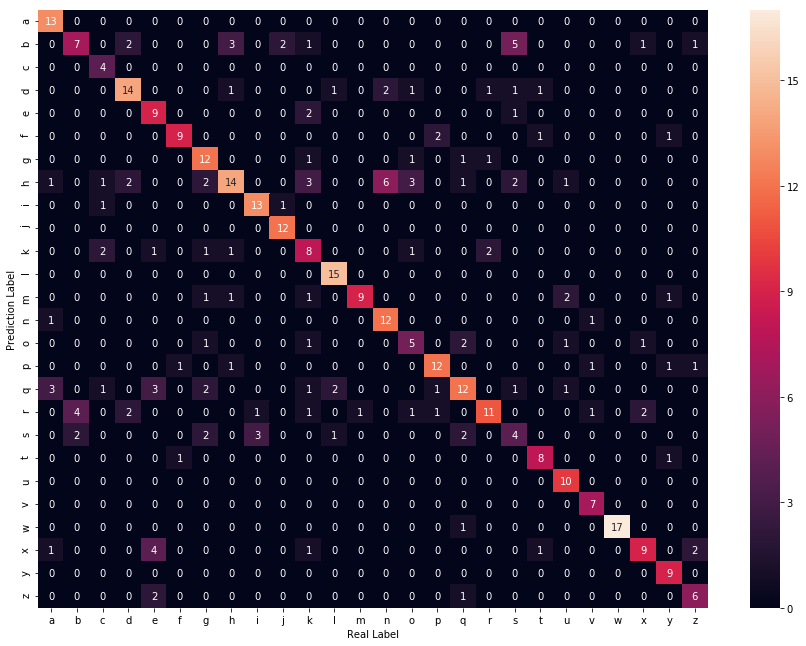

In [10]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "abcdefghijklmnopqrstuvwxyz"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz"])
plt.figure(figsize = (15,11))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [11]:
def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(1600):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(325):
        pred_outputs = get_pred_train(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
train_acc = np.sum(list_P == y)/1600
print("Train Accuracy:{}".format(train_acc))

Train Accuracy:0.7


In [13]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
avg_train_acc = np.mean(winner_fitness)
print("Avg Train Accuracy:{}".format(avg_train_acc))

Avg Train Accuracy:0.9314951103707195


In [14]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))

Total nodes:2560 Total connections::3559


In [15]:
with open("ovo3.txt","w") as f:
    for item in [avg_train_acc, train_acc, test_acc, total_nodes, total_connections]:
        f.write(str(item)+'\n')